# PYTHON Version

In [1]:
!python --version

Python 3.10.12


**YOUR RESULT MAY VARY WHEN YOU RUN IT ON YOUR DEVICE**

# Importing necessary libraries

In [3]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import losses

# 1. Data Generation

The first task was to generate the small data, which includes data about some products and late build a classification model with it.

So, my first intuition was to generate a small amount of data with some product information with the label **Recommended** and **Not Recommended**. So, it would be a binary classification problem.

I generated the product information data with **4 categories** which includes few types of products each, which became the **Prodcut name**. Added **Description**, **Base price** and **Rating** for each of the product.



In [3]:
# Let's create 4 categories, e.g, Electronics, Books, Clothing, Home & Kitchen

categories = {
    "Electronics": [
        "Smart Phone", "Laptop", "Headphones", "Smart Watch", "Camera"
    ],
    "Books": [
        "Mystery Novel", "Non-Fiction Book", "Science Fiction", "Fantasy Novel", "Biography"
    ],
    "Clothing": [
        "T-Shirt", "Jeans", "Jacket", "Sweater", "Dress"
    ],
    "Home & Kitchen": [
        "Blender", "Coffee Maker", "Cooking Utensils", "Toaster", "Microwave"
    ]
}


# Descrtiption for each categories

descriptions = {
    "Smart Phone": "A high-end smartphone with a large display and fast processor.",
    "Laptop": "A lightweight laptop with 16GB RAM and 512GB SSD.",
    "Headphones": "Wireless headphones with noise-canceling features and long battery life.",
    "Smart Watch": "A smart watch with fitness tracking and notification features.",
    "Camera": "A digital camera with high resolution and optical zoom.",
    "Mystery Novel": "A thrilling mystery novel with unexpected twists and turns.",
    "Non-Fiction Book": "An informative non-fiction book on the history of technology.",
    "Science Fiction": "A science fiction book set in a dystopian future.",
    "Fantasy Novel": "A fantasy novel with magical creatures and epic adventures.",
    "Biography": "A biography of a famous historical figure.",
    "T-Shirt": "A comfortable cotton t-shirt available in various sizes and colors.",
    "Jeans": "Stylish denim jeans with a slim fit design.",
    "Jacket": "A warm jacket perfect for cold weather.",
    "Sweater": "A cozy sweater made from soft wool.",
    "Dress": "An elegant dress suitable for formal occasions.",
    "Blender": "A powerful blender with multiple speed settings for smoothies and soups.",
    "Coffee Maker": "An automatic coffee maker with programmable settings and a built-in grinder.",
    "Cooking Utensils": "A set of durable cooking utensils made from stainless steel.",
    "Toaster": "A compact toaster with adjustable browning settings.",
    "Microwave": "A microwave with preset cooking modes and a defrost function."
}

# Base Prices for each of the products in USD

base_prices = {
    "Smart Phone": 699.99,
    "Laptop": 1199.99,
    "Headphones": 199.99,
    "Smart Watch": 299.99,
    "Camera": 499.99,
    "Mystery Novel": 14.99,
    "Non-Fiction Book": 24.99,
    "Science Fiction": 19.99,
    "Fantasy Novel": 18.99,
    "Biography": 21.99,
    "T-Shirt": 19.99,
    "Jeans": 49.99,
    "Jacket": 89.99,
    "Sweater": 59.99,
    "Dress": 79.99,
    "Blender": 89.99,
    "Coffee Maker": 129.99,
    "Cooking Utensils": 39.99,
    "Toaster": 29.99,
    "Microwave": 99.99
}

To actually generate the data and to replicate minimal customer behavior, I've added the labels ("Recommended", "Not Recommended") using a bit of logic.

So, the logic actually is the beahvior of how people buy products from online shop. So, for a product if it's rating is low and price is how people usually avoid that and vice versa.

So, a product is labeled as **"Not Recommended"** if the rating is low and the price is higher or equal to the base price. And, a product is **"Recommended"** if its rating is high and price is equal or less than the base price.

Also, If a product has very high rating regardless of the price, is also labeled as **"Recommended"**

In [87]:
## Function to generate the data ##

def generate_product_data():
    """
    Generates a random product data for a given category.
    Returns a dictionary with product name, category, description, and price.
    The price is generate randomly with the base price of the prodcut and a random
    value between - 5 to +5
    """
    category = random.choice(list(categories.keys()))
    product_name = random.choice(categories[category])
    description = descriptions[product_name]
    rating = random.choice([2.7, 3, 3.5, 3.7, 3.8, 4.0, 4.4, 4.5, 4.8, 5])
    price = base_prices[product_name] + round(random.uniform(-5, 5), 2)
    if rating <= 3.8 and price >= base_prices[product_name]:
        recommendation = 'Not Recommended'
    elif rating > 3.8 and rating <= 4.5 and price <= base_prices[product_name]:
        recommendation = 'Recommended'
    else:
        recommendation = 'Recommended'

    return {
        "product_name": product_name,
        "category": category,
        "description": description,
        "rating": rating,
        "price": price,
        "recommendation": recommendation
    }

In [88]:
## Generate the dataset ##
%%time
data = [generate_product_data() for _ in range(2000)]

CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 23.2 ms


In [89]:
df = pd.DataFrame(data)

In [90]:
df.head()

,product_name,category,description,rating,price,recommendation
0,Camera,Electronics,A digital camera with high resolution and opti...,5.0,497.70,Recommended
1,Mystery Novel,Books,A thrilling mystery novel with unexpected twis...,4.5,14.50,Recommended
2,T-Shirt,Clothing,A comfortable cotton t-shirt available in vari...,3.0,19.87,Recommended
3,Sweater,Clothing,A cozy sweater made from soft wool.,4.0,57.35,Recommended
4,Laptop,Electronics,A lightweight laptop with 16GB RAM and 512GB SSD.,3.5,1197.80,Recommended


# Data Preprocessing

For data preprocessing,

1. I've encoded the labels.

    * **0** for **"Not Recommended"** and **1** for **"Recommended"**
2. Creating a combined features colum using the **Product Name**, **Category**, **Description**, **Rating**, **Price**

3. **Tokenizing** the combined data

In [91]:
# Label encoding
df['recommendation'] = df['recommendation'].map({'Recommended': 1, 'Not Recommended': 0})

In [92]:
df.head()

,product_name,category,description,rating,price,recommendation
0,Camera,Electronics,A digital camera with high resolution and opti...,5.0,497.70,1
1,Mystery Novel,Books,A thrilling mystery novel with unexpected twis...,4.5,14.50,1
2,T-Shirt,Clothing,A comfortable cotton t-shirt available in vari...,3.0,19.87,1
3,Sweater,Clothing,A cozy sweater made from soft wool.,4.0,57.35,1
4,Laptop,Electronics,A lightweight laptop with 16GB RAM and 512GB SSD.,3.5,1197.80,1


In [93]:
df['recommendation'].value_counts()

recommendation
1    1483
0     517
Name: count, dtype: int64

In [98]:
# combining the all the features into one

def combine_features(row):
    features = "This {} from the {} category is {} Product rating is {}."\
     "The price of this product is {} USD.".format(row['product_name'],
                                                   row['category'],
                                                   row['description'],
                                                   row['rating'],
                                                   row['price'])
    return features

In [99]:
df['combined_features'] = df.apply(combine_features, axis=1)

In [100]:
df.head()

,product_name,category,description,rating,price,recommendation,combined_features
0,Camera,Electronics,A digital camera with high resolution and opti...,5.0,497.70,1,This Camera from the Electronics category is A...
1,Mystery Novel,Books,A thrilling mystery novel with unexpected twis...,4.5,14.50,1,This Mystery Novel from the Books category is ...
2,T-Shirt,Clothing,A comfortable cotton t-shirt available in vari...,3.0,19.87,1,This T-Shirt from the Clothing category is A c...
3,Sweater,Clothing,A cozy sweater made from soft wool.,4.0,57.35,1,This Sweater from the Clothing category is A c...
4,Laptop,Electronics,A lightweight laptop with 16GB RAM and 512GB SSD.,3.5,1197.80,1,This Laptop from the Electronics category is A...


In [101]:
df.loc[0, 'combined_features']

'This Camera from the Electronics category is A digital camera with high resolution and optical zoom. Product rating is 5.0. The price of this product is 497.7 USD.'

# Data Spliting

In [105]:
x_train, x_temp, y_train, y_temp = train_test_split(df['combined_features'], df['recommendation'], test_size=0.3,
                                                  random_state=11, stratify=df['recommendation'])

In [106]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=11)

In [107]:
print(f"Train shape: {x_train.shape}")
print(f"Validation shape: {x_val.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (1400,)
Validation shape: (300,)
Test shape: (300,)


# Custom Data generator and tokenization

A data generator class is defined to load the data and tokenize them in an efficient manner

In [108]:
# Data generator class

class DataGen(tf.keras.utils.Sequence):
    def __init__(self, x_data, y_data, batch_size, max_len, tokenizer):
        self.x_data = x_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.max_len = max_len
        self.tokenizer = tokenizer
        self.indices = np.arange(len(self.x_data))
        # self.on_epoch_end()

    def __len__(self):
        return len(self.x_data) // self.batch_size

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size: (index + 1) * self.batch_size]
        x_batch = self.x_data[batch_indices]
        y_batch = self.y_data[batch_indices]
        x_tokenized = self.tokenizer.texts_to_sequences(x_batch)
        x_padded = pad_sequences(x_tokenized, maxlen= self.max_len, padding='post')

        return x_padded, y_batch

As our dataset is small so the vocabulary is also small. So, max words and max sequence length are kept small.

max_words = 200
max_sequence_length = 120

In [109]:
# create the tokenizer

max_words = 200
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [110]:
max_sequence_length = 120
batch_size = 32

In [111]:
train_ds = DataGen(np.array(x_train), np.array(y_train), batch_size, max_sequence_length, tokenizer)
val_ds = DataGen(np.array(x_val), np.array(y_val), batch_size, max_sequence_length, tokenizer)
test_ds = DataGen(np.array(x_test), np.array(y_test), batch_size, max_sequence_length, tokenizer)

# Training with tensorflow framework

In [155]:
embedding_dim = 16
epochs = 100

In [126]:
model = tf.keras.Sequential([
  layers.Embedding(max_words, embedding_dim, input_length=max_sequence_length),
#   layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='sigmoid')])

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 120, 16)           3200      
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
 0 (GlobalAveragePooling1D)                                      
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                     

Not a big model, only has **3617** parameters

In [127]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


Training for **100** **epochs**

In [128]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)


Epoch 1/100
43/43 [==============================] - 1s 9ms/step - loss: 0.6705 - accuracy: 0.7326 - val_loss: 0.6439 - val_accuracy: 0.7431
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.7391 - val_loss: 0.5791 - val_accuracy: 0.7431
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.7391 - val_loss: 0.5672 - val_accuracy: 0.7431
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.7391 - val_loss: 0.5668 - val_accuracy: 0.7431
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5683 - accuracy: 0.7391 - val_loss: 0.5647 - val_accuracy: 0.7431
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7391 - val_loss: 0.5632 - val_accuracy: 0.7431
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5680 - accuracy: 0.7391 - val_loss: 0.5615 - val_accuracy: 0.7431
Epoch 8/100
4

The model clearly overfits. Which is not very surprising. As the dataset is quite small (only 2000 observations) and only used a pretty basic classification model to train on the data. But still gave quite a good result.

Please, refer to the Loss and Accuracy plot to visualize the behavior

In [129]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


9/9 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8056
Loss:  0.3815709948539734
Accuracy:  0.8055555820465088


In [130]:
import matplotlib.pyplot as plt

In [131]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

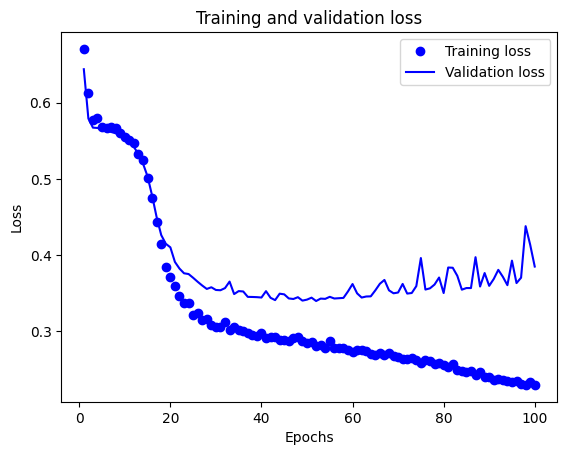

In [150]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

eps = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(eps, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(eps, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


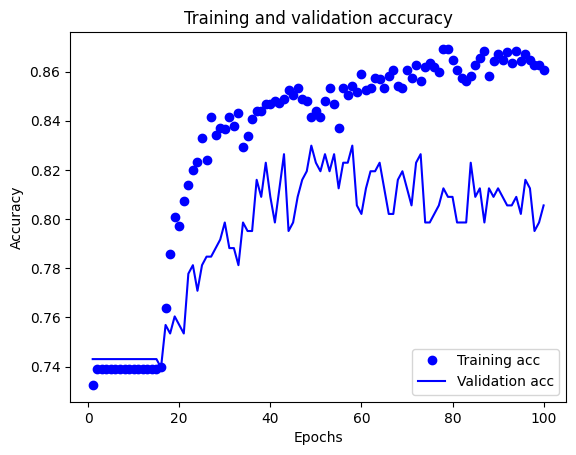

In [151]:
plt.plot(eps, acc, 'bo', label='Training acc')
plt.plot(eps, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


# Applying early stopping

As our previous model ran for 100 epochs with this small dataset, why don't we use early stopping to stop the train process early and also get a decent result. As not much is happening with the initial model and the accuracy stopped at ~80%. That was the intuition for me to use early stopping to see if it can get me a decent enough result and it did, actually

In [136]:
# same model with early stopping

model_1 = tf.keras.Sequential([
  layers.Embedding(max_words, embedding_dim, input_length=max_sequence_length),
#   layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='sigmoid')])

model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 120, 16)           3200      
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
 2 (GlobalAveragePooling1D)                                      
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                     

In [137]:
model_1.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


In [144]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Only ran for **79 epochs**

In [145]:
history_1 = model_1.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    epochs=epochs)

Epoch 1/100
43/43 [==============================] - 2s 14ms/step - loss: 0.6851 - accuracy: 0.6911 - val_loss: 0.6743 - val_accuracy: 0.7431
Epoch 2/100
43/43 [==============================] - 0s 8ms/step - loss: 0.6615 - accuracy: 0.7391 - val_loss: 0.6427 - val_accuracy: 0.7431
Epoch 3/100
43/43 [==============================] - 0s 8ms/step - loss: 0.6202 - accuracy: 0.7391 - val_loss: 0.5883 - val_accuracy: 0.7431
Epoch 4/100
43/43 [==============================] - 0s 8ms/step - loss: 0.5804 - accuracy: 0.7391 - val_loss: 0.5681 - val_accuracy: 0.7431
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7391 - val_loss: 0.5666 - val_accuracy: 0.7431
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7391 - val_loss: 0.5658 - val_accuracy: 0.7431
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5687 - accuracy: 0.7391 - val_loss: 0.5649 - val_accuracy: 0.7431
Epoch 8/100


Test result is better than the initial model. Refer to plots for better visualization

In [146]:
loss, accuracy = model_1.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


9/9 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8125
Loss:  0.3336855173110962
Accuracy:  0.8125


In [147]:
history_dict_1 = history_1.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

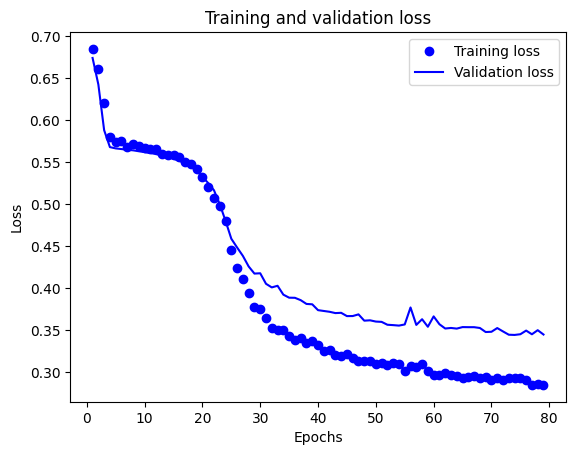

In [152]:
acc = history_dict_1['accuracy']
val_acc = history_dict_1['val_accuracy']
loss = history_dict_1['loss']
val_loss = history_dict_1['val_loss']

eps = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(eps, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(eps, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


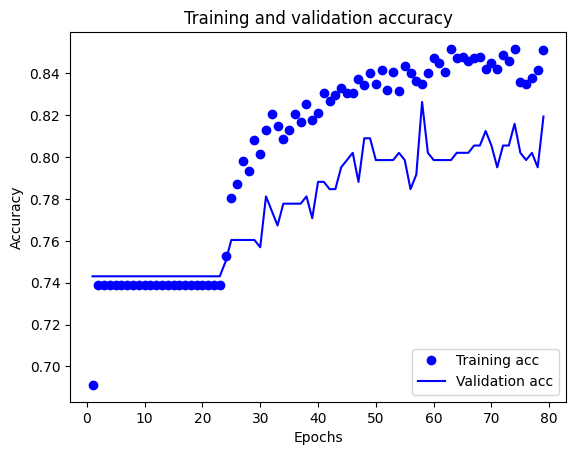

In [153]:
plt.plot(eps, acc, 'bo', label='Training acc')
plt.plot(eps, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


# **THANK YOU**